# PimaIndiansDiabetes Datasets

In [286]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [287]:
df = pd.read_csv('PimaIndiansDiabetes.csv')

In [288]:
df.sample(5)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
405,2,123,48,32,165,42.1,0.520,26,0
117,5,78,48,0,0,33.7,0.654,25,0
612,7,168,88,42,321,38.2,0.787,40,1
483,0,84,82,31,125,38.2,0.233,23,0
710,3,158,64,13,387,31.2,0.295,24,0


In [289]:
df.shape

(768, 9)

In [290]:
df.size

6912

In [291]:
df.Class.unique()

array([1, 0], dtype=int64)

In [292]:
df.Class.value_counts()

0    500
1    268
Name: Class, dtype: int64

In [293]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TimesPregnant         768 non-null    int64  
 1   GlucoseConcentration  768 non-null    int64  
 2   BloodPrs              768 non-null    int64  
 3   SkinThickness         768 non-null    int64  
 4   Serum                 768 non-null    int64  
 5   BMI                   768 non-null    float64
 6   DiabetesFunct         768 non-null    float64
 7   Age                   768 non-null    int64  
 8   Class                 768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [294]:
df.sample(3)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
513,2,91,62,0,0,27.3,0.525,22,0
230,4,142,86,0,0,44.0,0.645,22,1
76,7,62,78,0,0,32.6,0.391,41,0


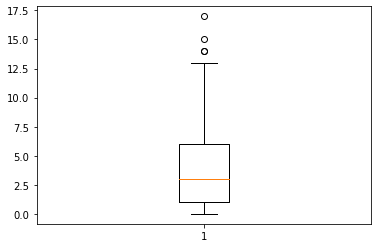

In [295]:
plt.boxplot(df['TimesPregnant'])
plt.show()

In [296]:
df = df[df['TimesPregnant']<13.0]

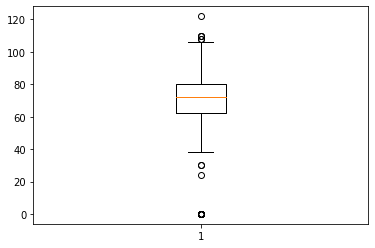

In [297]:
plt.boxplot(df['BloodPrs'])
plt.show()

In [298]:
df = df[df['BloodPrs']<113]  

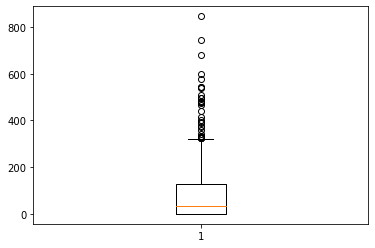

In [299]:
plt.boxplot(df['Serum'])
plt.show()

In [300]:
df = df[df['Serum']<300]

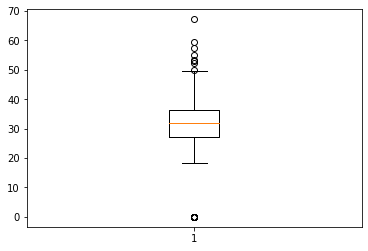

In [301]:
plt.boxplot(df['BMI'])
plt.show()

In [302]:
df = df[df['BMI']<51]

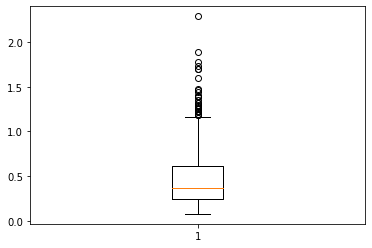

In [303]:
plt.boxplot(df['DiabetesFunct'])
plt.show()

In [304]:
df = df[df['DiabetesFunct']<1.6]

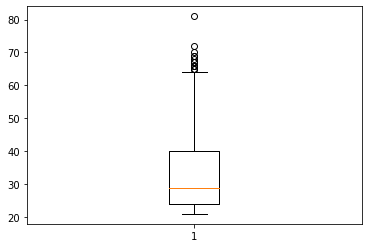

In [305]:
plt.boxplot(df['Age'])
plt.show()

In [306]:
df = df[df['Age']<65]

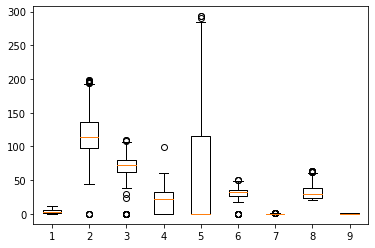

In [307]:
plt.boxplot(df)
plt.show()

In [401]:
df.sample()

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age,Class
432,1,80,74,11,60,30.0,0.527,22,0


In [422]:
#df.iloc[:,:-1]
X = df.loc[:,'TimesPregnant':'Age']
X.sample(3)

,TimesPregnant,GlucoseConcentration,BloodPrs,SkinThickness,Serum,BMI,DiabetesFunct,Age
335,0,165,76,43,255,47.9,0.259,26
118,4,97,60,23,0,28.2,0.443,22
352,3,61,82,28,0,34.4,0.243,46


In [403]:
y = df.Class
y[:3]

0    1
1    0
2    1
Name: Class, dtype: int64

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)
model = DecisionTreeClassifier()
model.fit(X_train,y_train)
print("Trainin Data:",model.score(X_train,y_train)*100)
print("Normal Data:",model.score(X,y)*100)
print("Testing Data:",model.score(X_test,y_test)*100)
y_predi = model.predict(X_test)
print("Predicted:",model.score(X_test,y_predi)*100)

Trainin Data: 100.0
Normal Data: 94.30656934306569
Testing Data: 77.32558139534885
Predicted: 100.0


In [425]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print("confusion_matrix:")
print(confusion_matrix(y_test,y_predi))
print("classification_report:")
print(classification_report(y_test,y_predi))
print("accuracy_score:")
print(accuracy_score(y_test,y_predi))

confusion_matrix:
[[90 26]
 [13 43]]
classification_report:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       116
           1       0.62      0.77      0.69        56

    accuracy                           0.77       172
   macro avg       0.75      0.77      0.75       172
weighted avg       0.79      0.77      0.78       172

accuracy_score:
0.7732558139534884


In [384]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_1 <= 154.50
|   |--- feature_5 <= 26.35
|   |   |--- feature_1 <= 138.00
|   |   |   |--- feature_6 <= 0.68
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.68
|   |   |   |   |--- feature_6 <= 0.71
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_6 >  0.71
|   |   |   |   |   |--- class: 0
|   |   |--- feature_1 >  138.00
|   |   |   |--- feature_2 <= 56.00
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  56.00
|   |   |   |   |--- class: 0
|   |--- feature_5 >  26.35
|   |   |--- feature_1 <= 101.50
|   |   |   |--- feature_6 <= 0.66
|   |   |   |   |--- feature_5 <= 37.30
|   |   |   |   |   |--- feature_0 <= 6.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_0 >  6.50
|   |   |   |   |   |   |--- feature_5 <= 30.80
|   |   |   |   |   |   |   |--- feature_6 <= 0.49
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_6 >  0.49
|   |   |   |   |   |   |   |   |--- class: 0
|

In [385]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

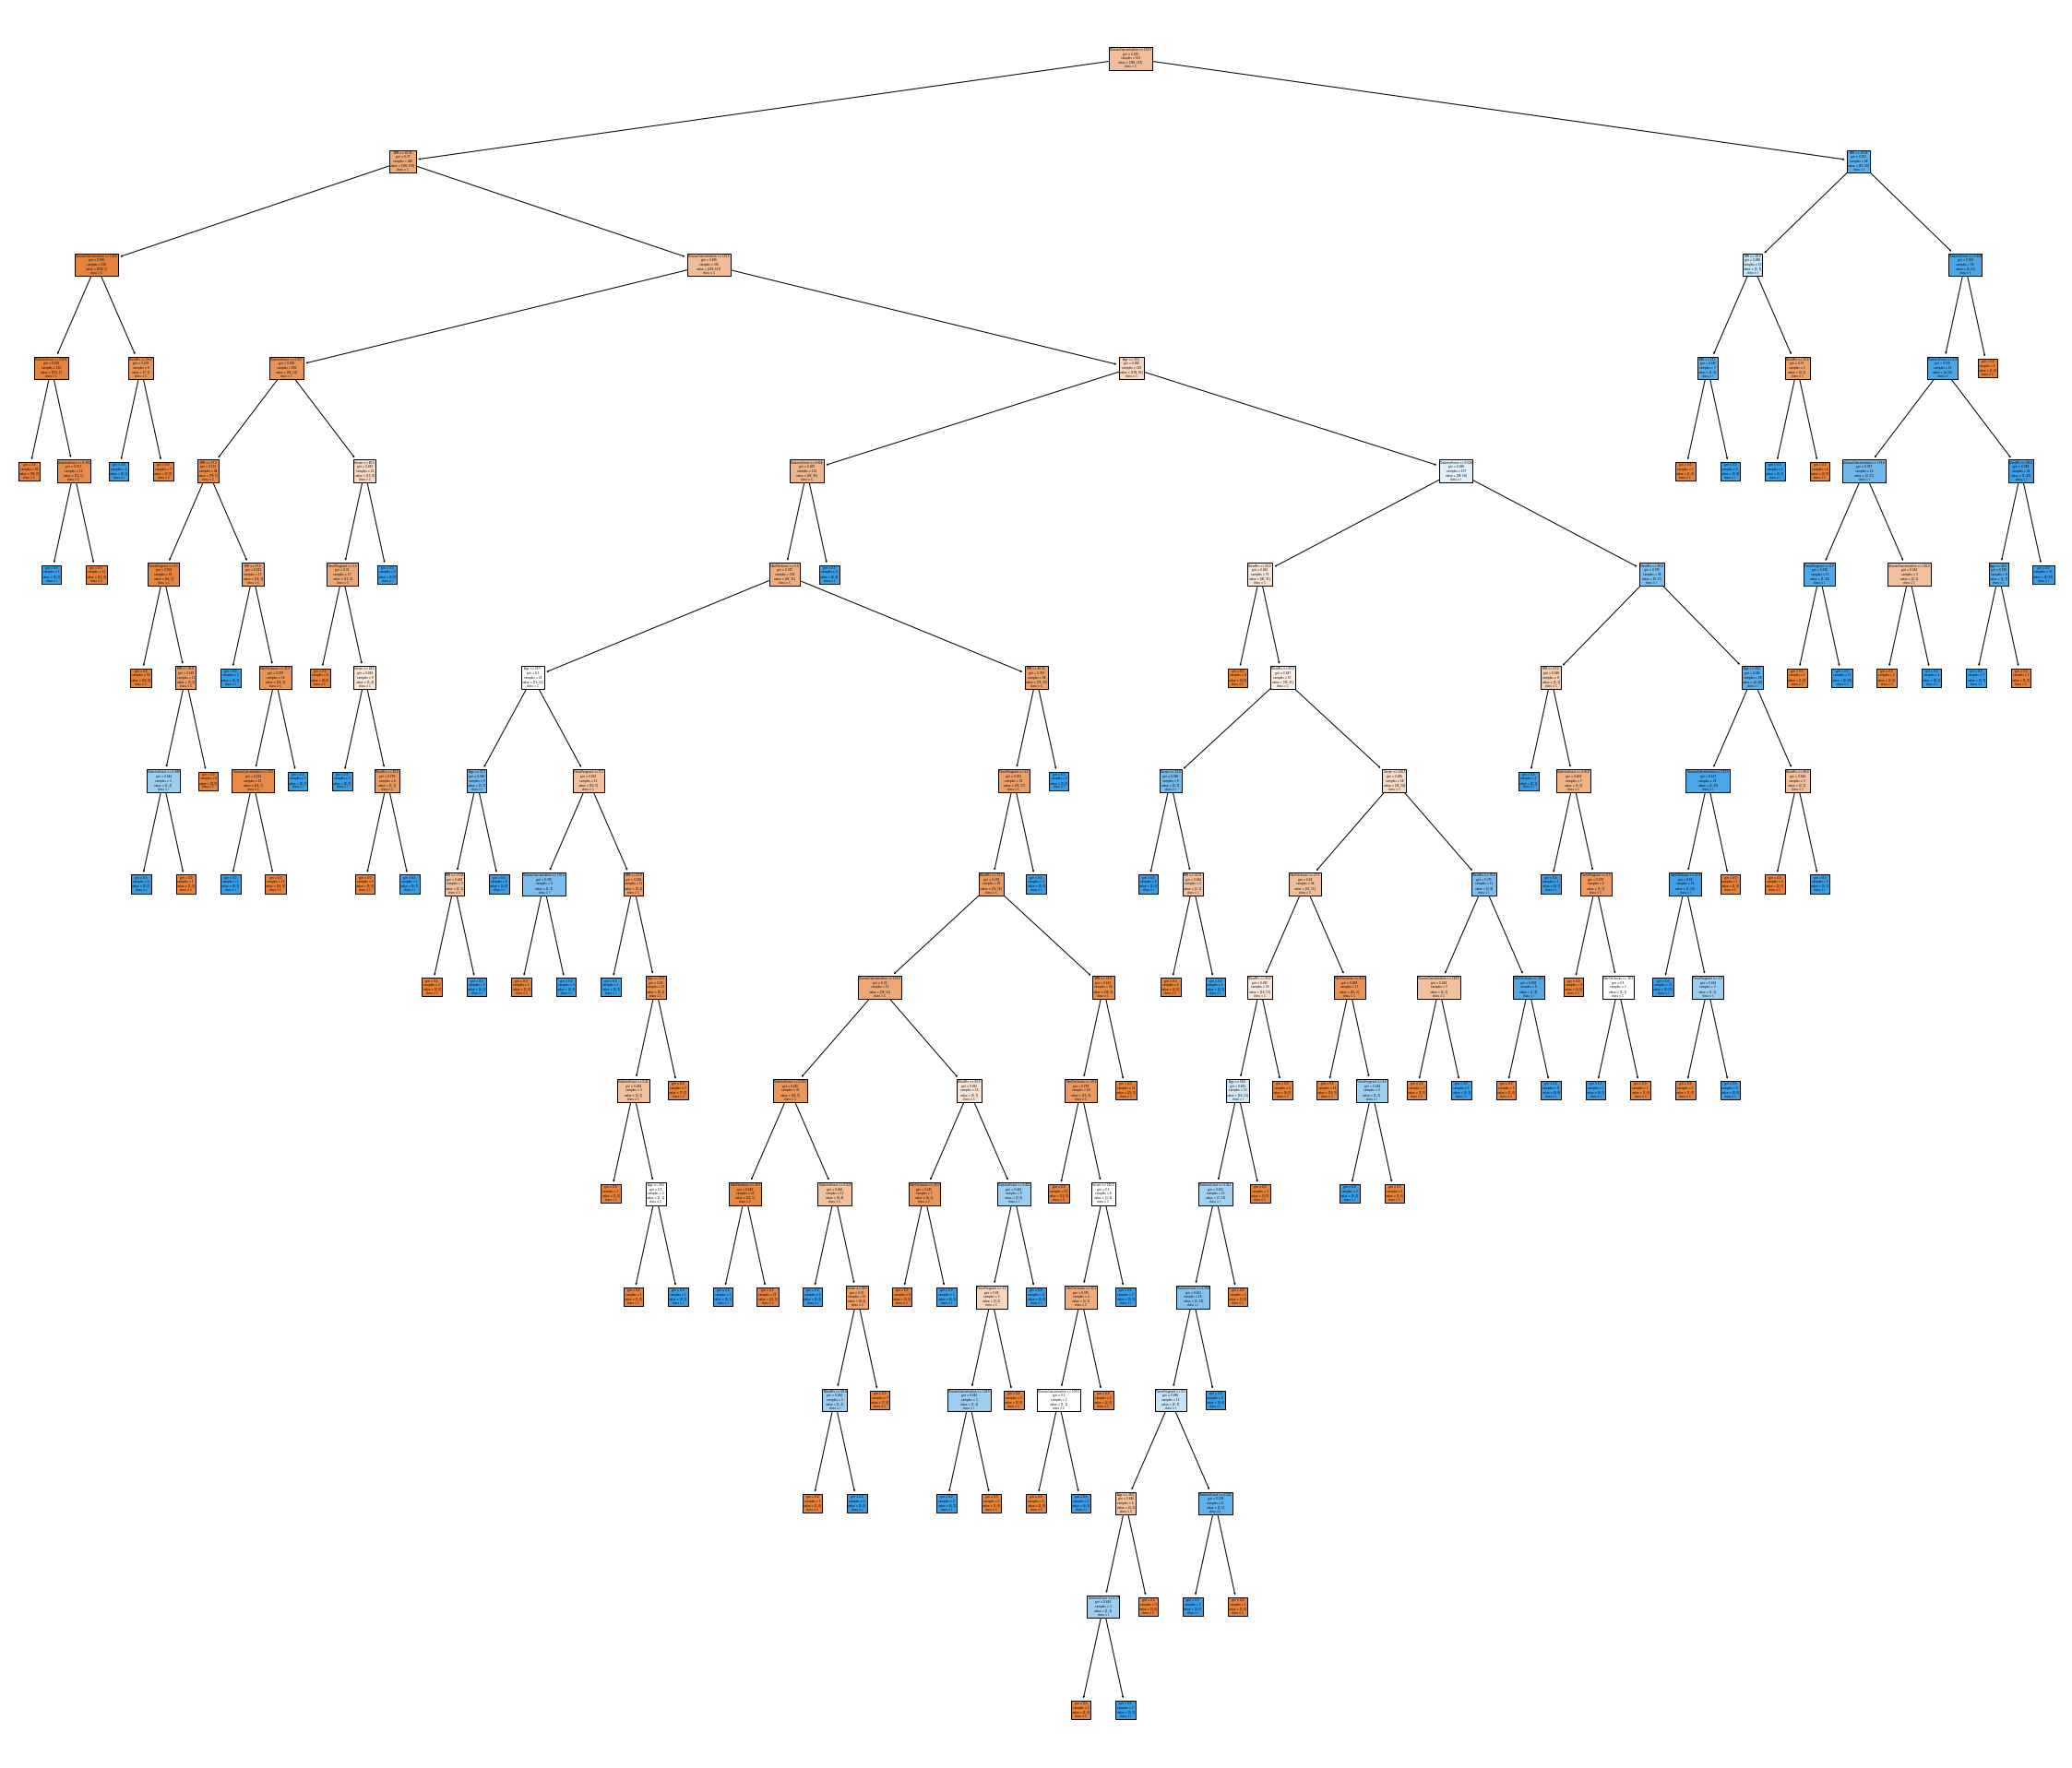

In [392]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,35))
_ = tree.plot_tree(model, 
                   feature_names=df.columns,  
                   class_names='Class',
                   filled=True)